## Identificare code smells con approcci basati su Machine Learning

In [2]:
# Import delle librerie necessarie
import pandas as pd
import mysql.connector
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, PrecisionRecallDisplay, roc_auc_score

In [3]:
result = pd.read_csv("complete_dataset.csv")
result.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CBO,20861.0,9.069316,11.370901,0.0,2.000000,5.0,12.0,207.0
CYCLO,20861.0,36.428359,71.593285,0.0,5.000000,14.0,34.0,956.0
DIT,20861.0,1.576387,0.494142,1.0,1.000000,2.0,2.0,2.0
ELOC,20861.0,209.126983,461.044339,2.0,24.000000,61.0,168.0,5438.0
FanIn,20861.0,145.199271,909.997981,0.0,1.000000,6.0,29.0,31934.0
FanOut,20861.0,39.832894,99.290150,0.0,1.000000,10.0,36.0,1926.0
LCOM,20861.0,195.574757,1016.795110,0.0,0.000000,3.0,36.0,21736.0
LOC,20861.0,209.126983,461.044339,2.0,24.000000,61.0,168.0,5438.0
LOCNAMM,20861.0,206.116869,458.603401,2.0,23.000000,59.0,166.0,5438.0
NOA,20861.0,5.989646,20.016290,0.0,0.000000,2.0,6.0,1634.0


In [4]:
result

,ComponentName,Project,CBO,CYCLO,DIT,ELOC,FanIn,FanOut,LCOM,LOC,...,WLOCNAMM,WMC,WMCNAMM,NMNOPARAM,CDSBP,CC,LC,LZC,RB,SC
0,example.Hello,ant-ivy-2.0.0-alpha2,1.0,1.0,1.0,11.0,3.0,4.0,0.0,11.0,...,6.000000,1.0,0.0,0.0,0,0,0,0,0,0
1,example.ConfigurationsExample,ant-ivy-2.0.0-alpha2,7.0,4.0,1.0,34.0,0.0,10.0,0.0,34.0,...,32.000000,4.0,0.0,0.0,0,0,0,0,0,0
2,filter.FilterProvider,ant-ivy-2.0.0-alpha2,0.0,4.0,1.0,18.0,1.0,3.0,0.0,18.0,...,16.000000,4.0,0.0,1.0,0,0,0,0,0,0
3,filter.IFilter,ant-ivy-2.0.0-alpha2,0.0,1.0,1.0,3.0,17.0,0.0,0.0,3.0,...,1.000000,1.0,0.0,0.0,0,0,0,0,0,0
4,filter.ccimpl.CCFilter,ant-ivy-2.0.0-alpha2,6.0,7.0,1.0,18.0,3.0,8.0,1.0,18.0,...,9.500000,7.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20857,jaxp.InputData,xerces2-j-Xerces-J_2_3_0,2.0,6.0,2.0,18.0,12.0,2.0,0.0,18.0,...,5.000000,6.0,0.0,1.0,0,0,0,0,0,0
20858,jaxp.JAXP12Tests,xerces2-j-Xerces-J_2_3_0,8.0,30.0,2.0,176.0,0.0,57.0,15.0,176.0,...,12.363636,30.0,0.0,10.0,0,0,0,0,0,0
20859,jaxp.JAXPConstants,xerces2-j-Xerces-J_2_3_0,0.0,0.0,1.0,11.0,4.0,0.0,0.0,11.0,...,NaN,0.0,0.0,0.0,0,0,0,0,0,0
20860,thread.Test,xerces2-j-Xerces-J_2_3_0,11.0,21.0,1.0,421.0,320.0,26.0,0.0,421.0,...,41.000000,21.0,0.0,1.0,0,0,0,0,0,0


## Data Preparation

### Data Cleaning

#### Poiché sono presenti valori Nan (Not a Number), onde evitare problemi di classificazione è preferibile eliminare i le istanze contenenti dati mancanti in quanto presenti in piccole quantità

#### Iniziamo vedendo quante istanze con valori NaN sono presenti

In [5]:
result.isnull().sum()

ComponentName      0
Project            0
CBO                1
CYCLO              1
DIT                1
ELOC               1
FanIn              1
FanOut             1
LCOM               1
LOC                1
LOCNAMM            1
NOA                1
NOC                1
NOM                1
NOMNAMM            1
NOPA               1
PMMM               1
PRB                1
WLOCNAMM         719
WMC                1
WMCNAMM            1
NMNOPARAM          1
CDSBP              0
CC                 0
LC                 0
LZC                0
RB                 0
SC                 0
dtype: int64

#### Analizziamo i risultati dopo l'eliminazione

In [6]:
result.dropna(inplace=True)
#Valori NaN eliminati
result.isnull().sum()

ComponentName    0
Project          0
CBO              0
CYCLO            0
DIT              0
ELOC             0
FanIn            0
FanOut           0
LCOM             0
LOC              0
LOCNAMM          0
NOA              0
NOC              0
NOM              0
NOMNAMM          0
NOPA             0
PMMM             0
PRB              0
WLOCNAMM         0
WMC              0
WMCNAMM          0
NMNOPARAM        0
CDSBP            0
CC               0
LC               0
LZC              0
RB               0
SC               0
dtype: int64

### Feature selection

#### Alcuni attributi, come: ComponentName o Project non sono utili ai fini della classificazione, quindi verranno eliminati

In [7]:
result.drop(['ComponentName', 'Project'], axis=1, inplace=True)

### Data Balancing
##### La variabile target che il modello deve predire in questo file è:
- RB: Refused Bequest;
##### Analizziamo la sua distribuzione per quantificare quanto è bilanciato il dataset rispetto alla variabile dipendente.


<AxesSubplot: xlabel='RB', ylabel='Count'>

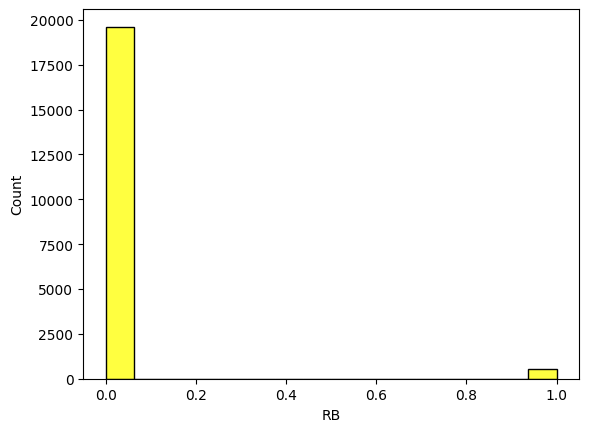

In [8]:
sns.histplot(result['RB'], legend=True, color='yellow')

#### Le istanze di classi che non contengono code smell di tipo "Refused Bequest" sono 19615, mentre quelle che contengono tale smell sono solo 528

In [9]:
result[result['RB'] == 0].count()

CBO          19615
CYCLO        19615
DIT          19615
ELOC         19615
FanIn        19615
FanOut       19615
LCOM         19615
LOC          19615
LOCNAMM      19615
NOA          19615
NOC          19615
NOM          19615
NOMNAMM      19615
NOPA         19615
PMMM         19615
PRB          19615
WLOCNAMM     19615
WMC          19615
WMCNAMM      19615
NMNOPARAM    19615
CDSBP        19615
CC           19615
LC           19615
LZC          19615
RB           19615
SC           19615
dtype: int64

In [10]:
result[result['RB'] == 1].count()

CBO          528
CYCLO        528
DIT          528
ELOC         528
FanIn        528
FanOut       528
LCOM         528
LOC          528
LOCNAMM      528
NOA          528
NOC          528
NOM          528
NOMNAMM      528
NOPA         528
PMMM         528
PRB          528
WLOCNAMM     528
WMC          528
WMCNAMM      528
NMNOPARAM    528
CDSBP        528
CC           528
LC           528
LZC          528
RB           528
SC           528
dtype: int64

#### Da come è possibile intuire, il dataset è fortemente sbilanciato. Le possibili soluzioni a questo problema sono due:
- Oversampling: aumentare il numero di istanze presenti nelle classi di minoranza;
- Undersampling: diminuire il numero di istanze presenti nelle classi di maggioranza;

#### Entrambe le soluzioni possono introdurre ulteriori problematiche, ad esempio l'undersampling casuale potrebbe portare alla rimozione di istanze particolarmente rilevanti per l’apprendimento del modello, mentre nel caso dell'oversampling, la duplicazione di istanze potrebbe creare overfitting

#### Bilanciamo il dataset aumentando il numero di istanze della classe di minoranza RB. Scegliamo casualmente 264 istanze (circa la metà) dalla classe di minoranza e aggiungiamo queste ultime al dataset.

In [11]:
# df_min classe di minoranza
df_min = result[result['RB'] == 1]

# Seme casuale
random = np.random.RandomState(None)

# Scelta casuale di 264 istanze 
idx = random.choice(df_min.index, 264, replace=True)
    
# seleziona le istanze del dataset originale corrispondenti agli indici selezionati
df_over = pd.concat([result, df_min.loc[idx]])

# finito il bilanciamento

#### Normalizzazione e addestramento

In [12]:
X = df_over.drop(['RB'], axis=1)
y = df_over['RB']
normalizer = MinMaxScaler()

In [13]:
# Creazione dell'oggetto KFold per eseguire la cross validation con 5 fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross validation
scores_mcc = []
scores_acc = []
scores_prec = []
scores_rec = []
scores_f1 = []
for train_index, test_index in kf.split(X):
    # split dei dati in training set e test set
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # normalizzazione del training set
    X_train_normalized = normalizer.fit_transform(X_train)

    # normalizzazione del test set utilizzando lo stesso normalizer del training set
    X_test_normalized = normalizer.transform(X_test)

    # addestramento del modello sui dati normalizzati
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_normalized, y_train)
    
    # valutazione del modello sui dati di test normalizzati
    y_pred = rf.predict(X_test_normalized)
    #scores.append(precision_score(y_test, y_pred, average='macro'))
    precision = precision_score(y_test, y_pred, average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='macro')

    scores_mcc.append(mcc)
    scores_acc.append(accuracy)
    scores_f1.append(f1)
    scores_prec.append(precision)
    scores_rec.append(recall)


In [14]:
print("Precision media della cross validation: %0.2f (+/- %0.2f)" % (np.mean(scores_prec), np.std(scores_prec) * 2))

Precision media della cross validation: 1.00 (+/- 0.00)


In [15]:
print("Accuracy media della cross validation: %0.2f (+/- %0.2f)" % (np.mean(scores_acc), np.std(scores_acc) * 2))

Accuracy media della cross validation: 1.00 (+/- 0.00)


In [16]:
print("Recall media della cross validation: %0.2f (+/- %0.2f)" % (np.mean(scores_rec), np.std(scores_rec) * 2))

Recall media della cross validation: 1.00 (+/- 0.00)


In [17]:
print("F1 media della cross validation: %0.2f (+/- %0.2f)" % (np.mean(scores_f1), np.std(scores_f1) * 2))

F1 media della cross validation: 0.99 (+/- 0.01)


In [18]:
print("MCC media della cross validation: %0.2f (+/- %0.2f)" % (np.mean(scores_mcc), np.std(scores_mcc) * 2))

MCC media della cross validation: 0.98 (+/- 0.02)
